In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import timeit
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv('input/SDSS_dr16.csv')

In [101]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,185.182780,1.189488,19.34126,18.46700,18.44940,18.33074,18.06268,756,301,6,463,4.330450e+18,QSO,2.627589,3846,55327,865
1,1.237650e+18,216.927113,0.824043,19.20285,18.19531,17.59929,17.22163,17.02410,756,301,5,675,3.446170e+17,GALAXY,0.150541,306,51637,335
2,1.237651e+18,130.183176,49.955453,18.53200,17.65095,17.24701,17.12667,17.10159,1331,301,2,175,8.231498e+18,STAR,-0.000139,7311,57038,158
3,1.237650e+18,146.011531,59.079110,18.68013,18.36549,18.32169,18.33179,18.27370,1331,301,4,261,5.100870e+17,QSO,0.775121,453,51915,196
4,1.237660e+18,190.489753,63.544891,19.15626,18.12416,17.64571,17.40442,17.13662,2304,301,6,214,8.794520e+17,QSO,2.613389,781,52373,450


In [102]:
df['class'].value_counts()

QSO       10000
GALAXY    10000
STAR      10000
Name: class, dtype: int64

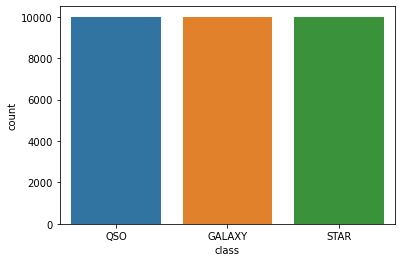

In [103]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

In [104]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,STAR,-0.000041
1,QSO,1.221699
0,GALAXY,0.077959


# Distance


In [105]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['redshift'])
df['distance']= r.value

df

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.237650e+18,185.182780,1.189488,19.34126,18.46700,18.44940,18.33074,18.06268,756,301,...,463,4.330450e+18,QSO,2.627589,3846,55327,865,285.802174,63.035462,6108.368629
1,1.237650e+18,216.927113,0.824043,19.20285,18.19531,17.59929,17.22163,17.02410,756,301,...,675,3.446170e+17,GALAXY,0.150541,306,51637,335,348.233668,54.993851,629.352569
2,1.237651e+18,130.183176,49.955453,18.53200,17.65095,17.24701,17.12667,17.10159,1331,301,...,175,8.231498e+18,STAR,-0.000139,7311,57038,158,169.209375,37.727774,-0.601223
3,1.237650e+18,146.011531,59.079110,18.68013,18.36549,18.32169,18.33179,18.27370,1331,301,...,261,5.100870e+17,QSO,0.775121,453,51915,196,154.790065,44.745507,2764.156832
4,1.237660e+18,190.489753,63.544891,19.15626,18.12416,17.64571,17.40442,17.13662,2304,301,...,214,8.794520e+17,QSO,2.613389,781,52373,450,124.708648,53.550649,6092.142805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.237652e+18,245.382180,51.272421,19.34043,18.26579,17.90533,17.77829,17.70416,1412,301,...,389,3.702108e+18,STAR,-0.000553,3288,54908,542,79.297336,43.987806,-2.393105
29996,1.237649e+18,181.406660,-1.017241,17.77664,16.16791,15.59226,15.40551,15.33608,756,301,...,438,3.256127e+18,STAR,0.000045,2892,54552,87,279.706369,59.772633,0.196054
29997,1.237650e+18,8.672036,15.573279,19.57385,18.31827,17.81188,17.61035,17.51804,1035,301,...,21,3.527563e+18,STAR,-0.000095,3133,54789,431,117.000353,-47.105469,-0.410696
29998,1.237651e+18,112.956179,37.318673,17.47377,16.36555,16.08178,15.97640,15.96756,1402,301,...,32,2.311624e+18,STAR,-0.000028,2053,53446,551,181.635506,23.610760,-0.118957


In [106]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.237650e+18,185.182780,1.189488,19.34126,18.46700,18.44940,18.33074,18.06268,756,301,...,2.627589,3846,55327,865,285.802174,63.035462,6108.368629,-6082.084215,-551.669980,126.803553
1,1.237650e+18,216.927113,0.824043,19.20285,18.19531,17.59929,17.22163,17.02410,756,301,...,0.150541,306,51637,335,348.233668,54.993851,629.352569,-503.052690,-378.075024,9.051204
2,1.237651e+18,130.183176,49.955453,18.53200,17.65095,17.24701,17.12667,17.10159,1331,301,...,-0.000139,7311,57038,158,169.209375,37.727774,-0.601223,0.249587,-0.295523,-0.460263
3,1.237650e+18,146.011531,59.079110,18.68013,18.36549,18.32169,18.33179,18.27370,1331,301,...,0.775121,453,51915,196,154.790065,44.745507,2764.156832,-1177.702589,794.025622,2371.308271
4,1.237660e+18,190.489753,63.544891,19.15626,18.12416,17.64571,17.40442,17.13662,2304,301,...,2.613389,781,52373,450,124.708648,53.550649,6092.142805,-2668.670009,-494.115092,5454.196056


In [107]:
df['u-r'] = df['u']-df['r']

In [108]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.237650e+18,185.182780,1.189488,19.34126,18.46700,18.44940,18.33074,18.06268,756,301,...,3846,55327,865,285.802174,63.035462,6108.368629,-6082.084215,-551.669980,126.803553,0.89186
1,1.237650e+18,216.927113,0.824043,19.20285,18.19531,17.59929,17.22163,17.02410,756,301,...,306,51637,335,348.233668,54.993851,629.352569,-503.052690,-378.075024,9.051204,1.60356
2,1.237651e+18,130.183176,49.955453,18.53200,17.65095,17.24701,17.12667,17.10159,1331,301,...,7311,57038,158,169.209375,37.727774,-0.601223,0.249587,-0.295523,-0.460263,1.28499
3,1.237650e+18,146.011531,59.079110,18.68013,18.36549,18.32169,18.33179,18.27370,1331,301,...,453,51915,196,154.790065,44.745507,2764.156832,-1177.702589,794.025622,2371.308271,0.35844
4,1.237660e+18,190.489753,63.544891,19.15626,18.12416,17.64571,17.40442,17.13662,2304,301,...,781,52373,450,124.708648,53.550649,6092.142805,-2668.670009,-494.115092,5454.196056,1.51055


In [109]:
df['class'] = df['class'].astype('category').cat.codes

In [110]:
df['class'].value_counts()

1    10000
0    10000
2    10000
Name: class, dtype: int64

In [111]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [112]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,2,-0.000041
1,1,1.221699
0,0,0.077959


In [113]:
X_df = df.drop(['objid','class','run','rerun','camcol','field','specobjid','plate','mjd','fiberid','ra','dec',"l","b","distance","x_coord","y_coord","z_coord","u-r"], axis=1).values
y_df = df['class'].values

In [114]:
X_df.shape

(30000, 6)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.30, random_state=44, shuffle =True)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 7.422011099999963


In [117]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  98.444


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3012
           1       0.99      0.97      0.98      3050
           2       1.00      1.00      1.00      2938

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



In [119]:
confusion_matrix(y_test, y_pred)

array([[2972,   28,   12],
       [  94, 2954,    2],
       [   4,    0, 2934]], dtype=int64)

# Lamost Test

In [120]:
df = pd.read_csv('Test/40879.csv')

In [121]:
df = df.dropna()

In [122]:
df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64


In [123]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950


In [124]:
df= df.dropna()

In [125]:
df[['z','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,z
2,STAR,-0.000207
1,QSO,1.590710
0,GALAXY,0.143196


In [126]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance,x_coord,y_coord,z_coord
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845,-0.530281,0.279558,0.021528
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369,0.456717,-0.238040,-0.018750
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017,-0.961188,0.499607,0.040033
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873,-0.647145,0.336702,0.023453
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950,0.334650,-0.175183,-0.012899


In [127]:
df['u-r'] = df['mag1']-df['mag4']

In [128]:
df['class'] = df['class'].astype('category').cat.codes

In [129]:
y_df = df['class']

In [130]:
columns_titles = ["mag1","mag2","mag4","mag3","mag5","z"]
data=df.reindex(columns=columns_titles)

In [131]:
X_df = data.values

In [132]:
y_pred = random_forest.predict(X_df)

In [133]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  98.861


In [134]:
print(classification_report(y_df, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       678
           1       0.58      0.98      0.73       112
           2       1.00      1.00      1.00      7462

    accuracy                           0.99      8252
   macro avg       0.85      0.95      0.88      8252
weighted avg       0.99      0.99      0.99      8252



In [135]:
confusion_matrix(y_df, y_pred)

array([[ 598,   80,    0],
       [   2,  110,    0],
       [  12,    0, 7450]], dtype=int64)

# SDSS Test

In [136]:
df = pd.read_csv('Test/tester.csv')

In [137]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,348.902530,1.271886,19.41061,18.23754,17.58132,17.20153,16.90159,94,301,6,94,4.301950e+17,GALAXY,0.032125,382,51816,368
1,1.237650e+18,51.443695,1.270073,19.54964,17.95799,17.02898,16.53100,16.13408,94,301,6,512,4.662350e+17,GALAXY,0.121315,414,51869,410
2,1.237650e+18,51.483584,1.272013,18.74425,17.37778,16.80538,16.51149,16.28756,94,301,6,512,4.662330e+17,GALAXY,0.048765,414,51869,401
3,1.237650e+18,49.627485,-1.041769,17.65021,16.16866,15.59175,15.37656,15.27109,109,301,1,100,1.705800e+18,STAR,-0.000098,1515,52932,208
4,1.237650e+18,40.285690,-0.714957,17.55033,15.75007,15.02809,14.66306,14.34982,109,301,2,37,4.593950e+17,GALAXY,0.040287,408,51821,100


In [138]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.237650e+18,348.902530,1.271886,19.41061,18.23754,17.58132,17.20153,16.90159,94,301,...,94,4.301950e+17,GALAXY,0.032125,382,51816,368,79.999146,-53.417022,10736.991499
1,1.237650e+18,51.443695,1.270073,19.54964,17.95799,17.02898,16.53100,16.13408,94,301,...,512,4.662350e+17,GALAXY,0.121315,414,51869,410,181.835143,-43.268565,10652.630358
2,1.237650e+18,51.483584,1.272013,18.74425,17.37778,16.80538,16.51149,16.28756,94,301,...,512,4.662330e+17,GALAXY,0.048765,414,51869,401,181.868542,-43.236905,10669.949173
3,1.237650e+18,49.627485,-1.041769,17.65021,16.16866,15.59175,15.37656,15.27109,109,301,...,100,1.705800e+18,STAR,-0.000098,1515,52932,208,182.681228,-46.146322,10550.724717
4,1.237650e+18,40.285690,-0.714957,17.55033,15.75007,15.02809,14.66306,14.34982,109,301,...,37,4.593950e+17,GALAXY,0.040287,408,51821,100,172.415197,-52.710632,10432.576982


In [139]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,STAR,0.000136
1,QSO,1.513582
0,GALAXY,0.063689


In [140]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.237650e+18,348.902530,1.271886,19.41061,18.23754,17.58132,17.20153,16.90159,94,301,...,0.032125,382,51816,368,79.999146,-53.417022,10736.991499,10533.626363,-2066.132260,238.326635
1,1.237650e+18,51.443695,1.270073,19.54964,17.95799,17.02898,16.53100,16.13408,94,301,...,0.121315,414,51869,410,181.835143,-43.268565,10652.630358,6637.976588,8328.268075,236.116994
2,1.237650e+18,51.483584,1.272013,18.74425,17.37778,16.80538,16.51149,16.28756,94,301,...,0.048765,414,51869,401,181.868542,-43.236905,10669.949173,6642.954414,8346.428480,236.862049
3,1.237650e+18,49.627485,-1.041769,17.65021,16.16866,15.59175,15.37656,15.27109,109,301,...,-0.000098,1515,52932,208,182.681228,-46.146322,10550.724717,6833.149880,8036.731774,-191.825888
4,1.237650e+18,40.285690,-0.714957,17.55033,15.75007,15.02809,14.66306,14.34982,109,301,...,0.040287,408,51821,100,172.415197,-52.710632,10432.576982,7957.661463,6745.171624,-130.177939


In [141]:
df['u-r'] = df['u']-df['r']

In [142]:
df = df.dropna()

In [143]:
df['class']=df['class'].map({'STAR':2,'GALAXY':0,'QSO':1}).astype(int)

In [144]:
columns_titles = ["u","g","r","i","z","redshift","class"]
data=df.reindex(columns=columns_titles)

In [145]:
data.head()

,u,g,r,i,z,redshift,class
0,19.41061,18.23754,17.58132,17.20153,16.90159,0.032125,0
1,19.54964,17.95799,17.02898,16.53100,16.13408,0.121315,0
2,18.74425,17.37778,16.80538,16.51149,16.28756,0.048765,0
3,17.65021,16.16866,15.59175,15.37656,15.27109,-0.000098,2
4,17.55033,15.75007,15.02809,14.66306,14.34982,0.040287,0


In [146]:
y_df = data['class']
X_df = data.loc[:, data.columns != 'class'].values

In [147]:
y_pred = random_forest.predict(X_df)

In [148]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  99.7


# 97.72 & 99.7 & 98.994